In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

import os

Read Data

In [ ]:
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

In [ ]:
#Select feature column names and target variable we are going to use for training
Gender  = {'Male': 1,'Female': 0}

# traversing through dataframe
# Gender column and writing
# values where key matches
train.Gender = [Gender[item] for item in train.Gender]
print(train)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1       1   44                1         28.0                   0   
1            2       1   76                1          3.0                   0   
2            3       1   47                1         28.0                   0   
3            4       1   21                1         11.0                   1   
4            5       0   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105       1   74                1         26.0                   1   
381105  381106       1   30                1         37.0                   1   
381106  381107       1   21                1         30.0                   1   
381107  381108       0   68                1         14.0                   0   
381108  381109       1   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [ ]:
#Select feature column names and target variable we are going to use for training
Vehicle_Age  = {'> 2 Years': 0,'1-2 Year': 1,'< 1 Year': 2}

# traversing through dataframe
# Vehicle_Age column and writing
# values where key matches
train.Vehicle_Age = [Vehicle_Age[item] for item in train.Vehicle_Age]
print(train)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1       1   44                1         28.0                   0   
1            2       1   76                1          3.0                   0   
2            3       1   47                1         28.0                   0   
3            4       1   21                1         11.0                   1   
4            5       0   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105       1   74                1         26.0                   1   
381105  381106       1   30                1         37.0                   1   
381106  381107       1   21                1         30.0                   1   
381107  381108       0   68                1         14.0                   0   
381108  381109       1   46                1         29.0                   0   

        Vehicle_Age Vehicle

In [ ]:
#Select feature column names and target variable we are going to use for training
Vehicle_Damage  = {'Yes': 0,'No': 1}

# traversing through dataframe
# Vehicle_Age column and writing
# values where key matches
train.Vehicle_Damage = [Vehicle_Damage[item] for item in train.Vehicle_Damage]
print(train)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1       1   44                1         28.0                   0   
1            2       1   76                1          3.0                   0   
2            3       1   47                1         28.0                   0   
3            4       1   21                1         11.0                   1   
4            5       0   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105       1   74                1         26.0                   1   
381105  381106       1   30                1         37.0                   1   
381106  381107       1   21                1         30.0                   1   
381107  381108       0   68                1         14.0                   0   
381108  381109       1   46                1         29.0                   0   

        Vehicle_Age  Vehicl

Info train

In [ ]:
train.info()
train[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,0,0,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,1,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,0,0,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,2,1,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,2,1,27496.0,152.0,39,0
5,6,0,24,1,33.0,0,2,0,2630.0,160.0,176,0
6,7,1,23,1,11.0,0,2,0,23367.0,152.0,249,0
7,8,0,56,1,28.0,0,1,0,32031.0,26.0,72,1
8,9,0,24,1,3.0,1,2,1,27619.0,152.0,28,0
9,10,0,32,1,6.0,1,2,1,28771.0,152.0,80,0


In [ ]:
#Select feature column names and target variable we are going to use for training
Gender  = {'Male': 1,'Female': 0}

# traversing through dataframe
# Gender column and writing
# values where key matches
test.Gender = [Gender[item] for item in test.Gender]
print(test)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110       1   25                1         11.0                   1   
1       381111       1   40                1         28.0                   0   
2       381112       1   47                1         28.0                   0   
3       381113       1   24                1         27.0                   1   
4       381114       1   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142       0   26                1         37.0                   1   
127033  508143       0   38                1         28.0                   0   
127034  508144       1   21                1         46.0                   1   
127035  508145       1   71                1         28.0                   1   
127036  508146       1   41                1         29.0                   1   

       Vehicle_Age Vehicle_

In [ ]:
#Select feature column names and target variable we are going to use for training
Vehicle_Damage  = {'Yes': 1,'No':0}

# traversing through dataframe
# Vehicle_Age column and writing
# values where key matches
test.Vehicle_Damage = [Vehicle_Damage[item] for item in test.Vehicle_Damage]
print(test)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110       1   25                1         11.0                   1   
1       381111       1   40                1         28.0                   0   
2       381112       1   47                1         28.0                   0   
3       381113       1   24                1         27.0                   1   
4       381114       1   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142       0   26                1         37.0                   1   
127033  508143       0   38                1         28.0                   0   
127034  508144       1   21                1         46.0                   1   
127035  508145       1   71                1         28.0                   1   
127036  508146       1   41                1         29.0                   1   

       Vehicle_Age  Vehicle

In [ ]:
#Select feature column names and target variable we are going to use for training
Vehicle_Age  = {'> 2 Years': 0,'1-2 Year': 1,'< 1 Year': 2}

# traversing through dataframe
# Vehicle_Age column and writing
# values where key matches
test.Vehicle_Age = [Vehicle_Age[item] for item in test.Vehicle_Age]
print(test)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110       1   25                1         11.0                   1   
1       381111       1   40                1         28.0                   0   
2       381112       1   47                1         28.0                   0   
3       381113       1   24                1         27.0                   1   
4       381114       1   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142       0   26                1         37.0                   1   
127033  508143       0   38                1         28.0                   0   
127034  508144       1   21                1         46.0                   1   
127035  508145       1   71                1         28.0                   1   
127036  508146       1   41                1         29.0                   1   

        Vehicle_Age  Vehicl

In [ ]:
test.info()
test[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  int64  
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  int64  
 7   Vehicle_Damage        127037 non-null  int64  
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 10.7 MB


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,2,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,2,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,2,0,59097.0,152.0,297
5,381115,1,22,1,30.0,1,2,0,40207.0,152.0,266
6,381116,0,51,1,37.0,1,1,0,40118.0,26.0,107
7,381117,1,25,1,41.0,1,2,0,23375.0,152.0,232
8,381118,1,42,1,41.0,0,1,1,2630.0,26.0,277
9,381119,0,37,1,12.0,1,1,0,27124.0,124.0,133


In [ ]:
print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



In [ ]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=train["Response"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Response,
0,334399
1,46710


<Axes: >

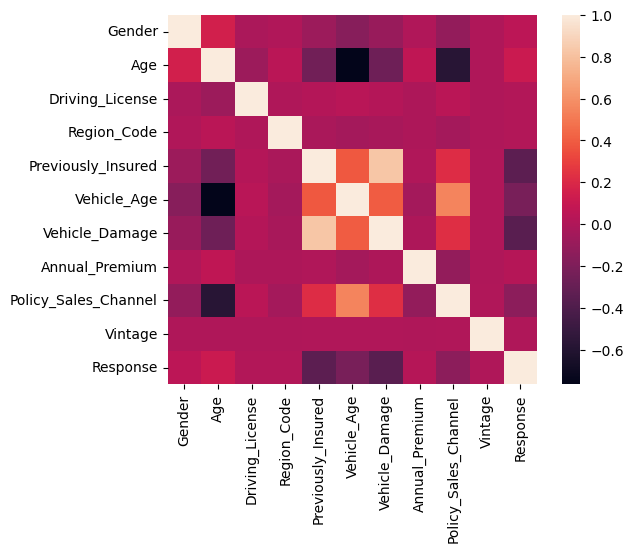

In [ ]:
train = train[['Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium',
'Policy_Sales_Channel','Vintage','Response']] #Subsetting the data
cor = train.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [ ]:
#Select feature column names and target variable we are going to use for training
features=['Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium',
'Policy_Sales_Channel','Vintage']
target = 'Response'

In [ ]:
#This is input which our classifier will use as an input.
train[features].head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,0,0,40454.0,26.0,217
1,1,76,1,3.0,0,1,1,33536.0,26.0,183
2,1,47,1,28.0,0,0,0,38294.0,26.0,27
3,1,21,1,11.0,1,2,1,28619.0,152.0,203
4,0,29,1,41.0,1,2,1,27496.0,152.0,39
5,0,24,1,33.0,0,2,0,2630.0,160.0,176
6,1,23,1,11.0,0,2,0,23367.0,152.0,249
7,0,56,1,28.0,0,1,0,32031.0,26.0,72
8,0,24,1,3.0,1,2,1,27619.0,152.0,28
9,0,32,1,6.0,1,2,1,28771.0,152.0,80


In [ ]:
#Display first 10 target variables
train[target].head(10).values

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# We define the RF model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(train[features],train[target])

RandomForestClassifier(n_jobs=-1, random_state=9)

In [ ]:
x#Make predictions using the features from the test data set
predictions = rfcla .predict(test[features])

#Display our predictions
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Create a  DataFrame
submission = pd.DataFrame({'id':test['id'],'Response':predictions})

#Visualize the first 5 rows
submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [ ]:
from sklearn.model_selection import train_test_split

# Here 'train' is DataFrame and 'features' and 'target' are defined as before
X = train[features]
y = train[target]

# Split the training data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and validation sets created.")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Training and validation sets created.
x_train shape: (304887, 10)
x_test shape: (76222, 10)
y_train shape: (304887,)
y_test shape: (76222,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.1510555822325904

In [ ]:
from sklearn.metrics import mean_squared_error as mse
predicted = lr.predict(x_test)
error = mse(y_test, predicted) ** .5
print(error)

0.30465326853560215


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models = [RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression()]
errors = {}

for model in models:
    model.fit(x_train, y_train)
    name = type(model).__name__
    score = model.score(x_test, y_test) * 100
    errors[name] = score

In [ ]:
errors

{'RandomForestRegressor': 13.319893377877246,
 'DecisionTreeRegressor': -62.37723845486973,
 'LinearRegression': 15.105558223259042}

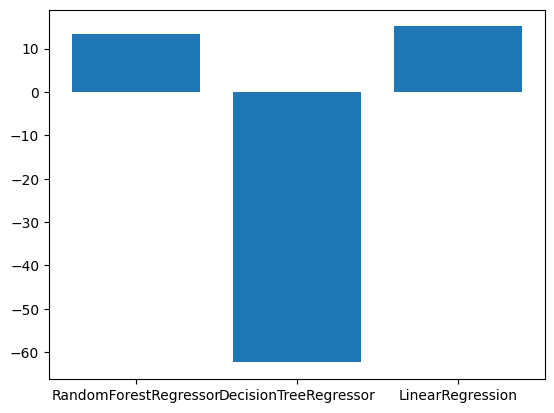

In [ ]:
import matplotlib.pyplot as plt
plt.bar(errors.keys(), errors.values())
plt.show()

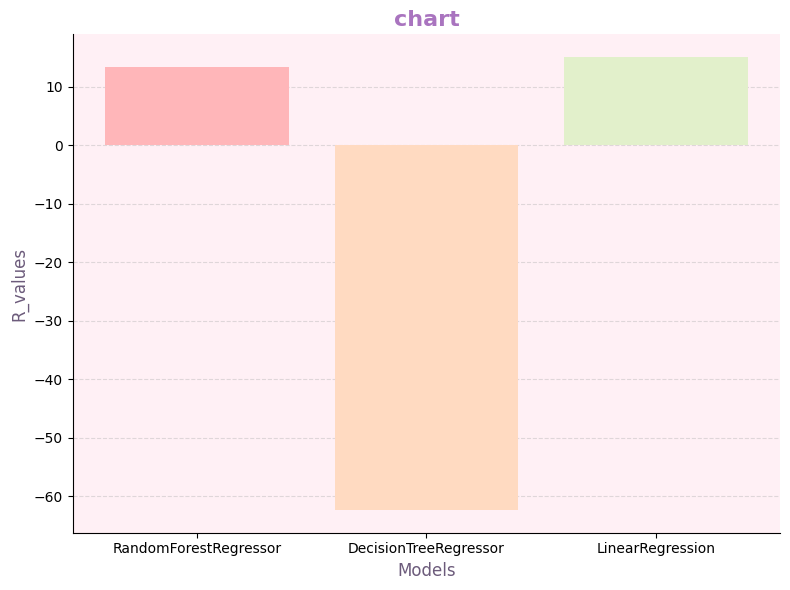

In [ ]:
import matplotlib.pyplot as plt

cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA']

plt.figure(figsize = (8, 6))
bars = plt.bar(errors.keys(), errors.values(), color = cute_colors[:len(errors)])

for bar in bars:
  bar.set_linewidth(0)
  bar.set_edgecolor('none')
  bar.set_zorder(3)

plt.title('chart', fontsize = 16, fontweight = 'bold', color = '#a974BF')
plt.xlabel('Models', fontsize = 12, color = '#6C5B7B')
plt.ylabel('R_values', fontsize = 12, color = '#6C5B7B')


plt.gca().set_facecolor('#FFF0F5')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.4)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

print("🔹 Gradient Boosting")
print("Accuracy:", gb.score(x_test, y_test) * 100, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

🔹 Gradient Boosting
Accuracy: 87.50623179659416 %
Confusion Matrix:
 [[66699     0]
 [ 9523     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("🔹 KNN")
print("Accuracy:", knn.score(x_test, y_test) * 100, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

🔹 KNN
Accuracy: 85.65637217601217 %
Confusion Matrix:
 [[64783  1916]
 [ 9017   506]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     66699
           1       0.21      0.05      0.08      9523

    accuracy                           0.86     76222
   macro avg       0.54      0.51      0.50     76222
weighted avg       0.79      0.86      0.82     76222



In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

print("🔹 Naive Bayes")
print("Accuracy:", nb.score(x_test, y_test) * 100, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

🔹 Naive Bayes
Accuracy: 82.2374117708798 %
Confusion Matrix:
 [[59269  7430]
 [ 6109  3414]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     66699
           1       0.31      0.36      0.34      9523

    accuracy                           0.82     76222
   macro avg       0.61      0.62      0.62     76222
weighted avg       0.83      0.82      0.83     76222



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("🔹 Decision Tree")
print("Accuracy:", dt.score(x_test, y_test) * 100, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

🔹 Decision Tree
Accuracy: 82.19018131248195 %
Confusion Matrix:
 [[59772  6927]
 [ 6648  2875]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     66699
           1       0.29      0.30      0.30      9523

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222



In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

print("🔹 Logistic Regression")
print("Accuracy:", log_reg.score(x_test, y_test) * 100, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

🔹 Logistic Regression
Accuracy: 87.50623179659416 %
Confusion Matrix:
 [[66698     1]
 [ 9522     1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.50      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.69      0.50      0.47     76222
weighted avg       0.83      0.88      0.82     76222



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
